Question 3: Collecting Data, Establishing a Mathematical Model, and Analyzing the Impact of New Energy Electric Vehicles on the Global Traditional Energy Vehicle Industry.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import spearmanr

In [2]:
def get_file_path(folder_name):
    paths = []
    folder_name = os.path.join(os.curdir, folder_name)
    for file_name in os.listdir(folder_name):
        path = os.path.join(folder_name, file_name)
        if path.lower().endswith(".csv"):
            paths.append(path)
        else: paths.append(get_file_path(path))
    return paths

Display of Raw Data

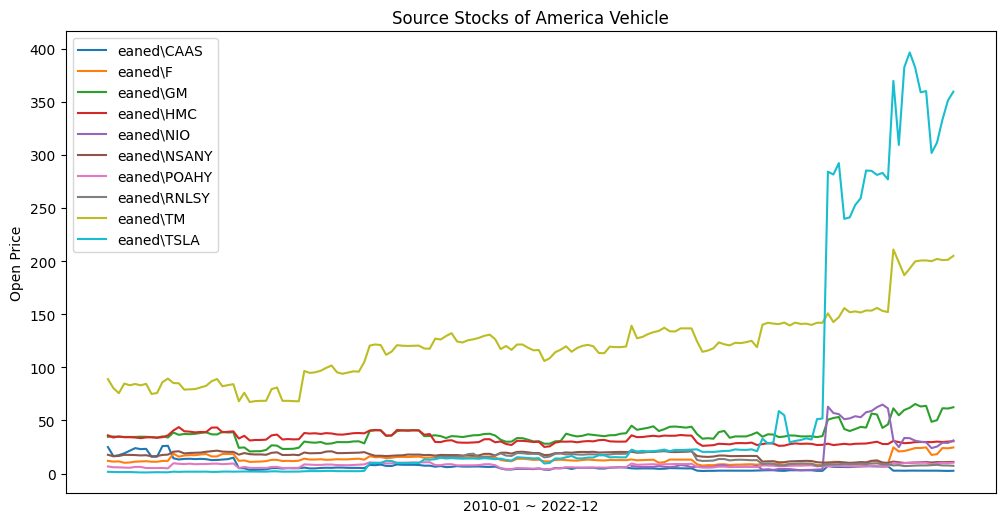

In [3]:
path = './USstock_cleaned'
file_paths = get_file_path(path)
plt.figure(figsize=(12, 6))
plt.title('Source Stocks of America Vehicle')
plt.xlabel('2010-01 ~ 2022-12')
plt.ylabel('Open Price')
plt.xticks([])
for file_path in file_paths:
    file_name = file_path[14:]
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%m')
    start_date = '2010-01'
    end_date = '2022-12'
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df = df.groupby(df['Date'])['Open'].first().reset_index()
    df.set_index('Date', inplace=True)
    file_name = file_name.split('.')[0]
    if file_name == 'NIO':
        plt.plot(df['Open'], label=file_name, marker = '^')
        continue
    elif file_name == 'TSLA':
        plt.plot(df['Open'], label=file_name, marker = '*')
        continue
    plt.plot(df['Open'], label=file_name)


plt.legend()
plt.show()

Data Integration

eaned\CAAS Loaded
eaned\F Loaded
eaned\GM Loaded
eaned\HMC Loaded
eaned\NIO Loaded
eaned\NSANY Loaded
eaned\POAHY Loaded
eaned\RNLSY Loaded
eaned\TM Loaded
eaned\TSLA Loaded


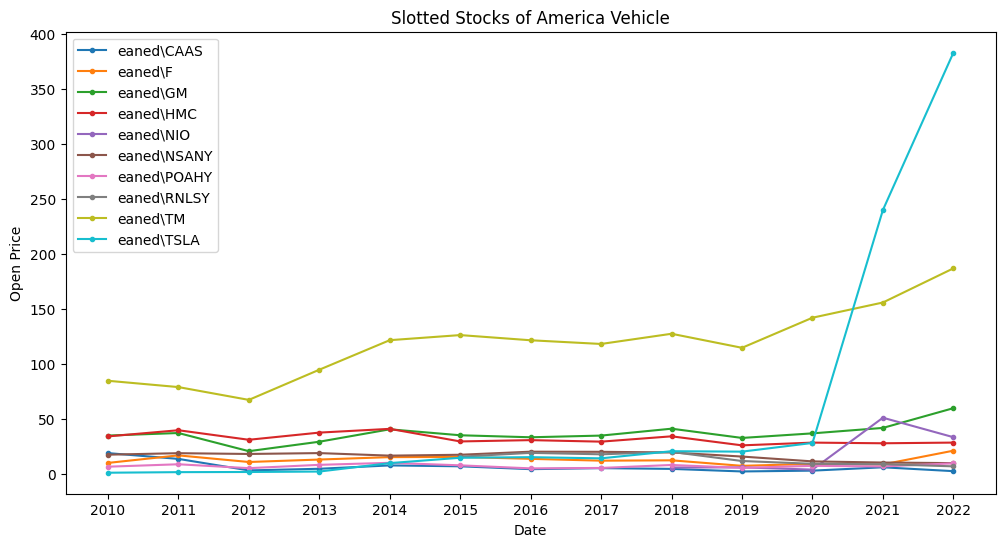

10


In [4]:
path = './USstock_cleaned'
file_paths = get_file_path(path)
conv_stocks = []
conv_names = []
EV_stock_df = []
EV_names = []
plt.figure(figsize=(12, 6))
plt.title('Slotted Stocks of America Vehicle')
plt.xlabel('Date')
plt.ylabel('Open Price')
for file_path in file_paths:
    file_name = file_path[14:]
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y')
    start_date = '2010'
    end_date = '2022'
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df = df.groupby(df['Date'])['Open'].first().reset_index()
    df.set_index('Date', inplace=True)
    file_name = file_name.split('.')[0]
    if file_name =='NIO':
        EV_stock_df.append(df)
        EV_names.append(file_name)
        plt.plot(df['Open'], label=file_name, marker = '^')
        continue
    if file_name =='TSLA':
        EV_stock_df.append(df)
        EV_names.append(file_name)
        plt.plot(df['Open'], label=file_name, marker = '*')
        continue
    plt.plot(df['Open'], label=file_name, marker = '.')
    conv_stocks.append(df)
    conv_names.append(file_name)
    print(f'{file_name} Loaded')

plt.legend()
plt.show()
print(len(conv_stocks))

In [14]:
i = 0
for i in range(8):
    df = conv_stocks[i]
    n = conv_names[i]
    print(f'{n}, {len(df)}')
    if len(df) == 8:
        conv_stocks.pop(i)
        conv_names.pop(i)
        break
print('After drop RNLSY:')
for i in range(len(conv_stocks)):
    df = conv_stocks[i]
    n = conv_names[i]
    print(f'{n}, {len(df)}')

eaned\CAAS, 13
eaned\F, 13
eaned\GM, 13
eaned\HMC, 13
eaned\NIO, 5
eaned\NSANY, 13
eaned\POAHY, 13
eaned\TM, 13
After drop RNLSY:
eaned\CAAS, 13
eaned\F, 13
eaned\GM, 13
eaned\HMC, 13
eaned\NIO, 5
eaned\NSANY, 13
eaned\POAHY, 13
eaned\TM, 13
eaned\TSLA, 13


In [15]:
global_sales = pd.read_excel('./Global_EV&ConV_yearly_sales.xlsx')
global_sales.set_index('Year', inplace=True)
global_sales.head(20)

,Total Sales (Million),EV Sales (Million),Conventional Sales (Million),Domestic EV Sales (Million)
Year,,,,
2010,77.60,0.0,77.60,0.001
2011,75.00,0.0,75.00,0.006
2012,82.00,0.0,82.00,0.013
2013,82.80,0.2,82.60,0.018
2014,85.00,0.3,84.70,0.075
2015,89.76,0.5,89.26,0.331
2016,84.24,0.8,83.44,0.507
2017,86.05,1.2,84.85,0.777
2018,86.00,1.6,84.40,1.256


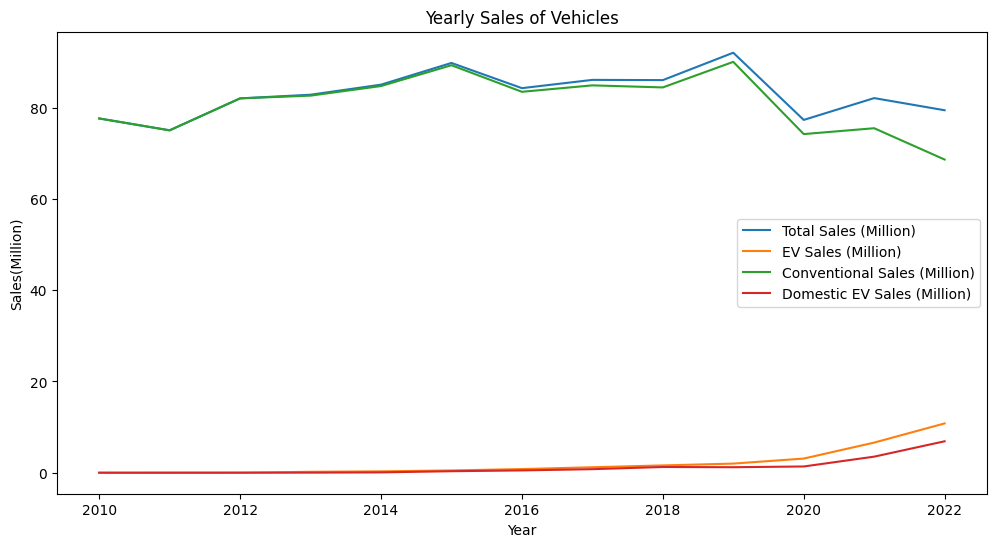

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Yearly Sales of Vehicles')
plt.xlabel('Year')
plt.ylabel('Sales(Million)')
for col in global_sales.columns:
    plt.plot(global_sales[col], label = col)
plt.legend()
plt.show()

### Correlation Analysis

1. Correlation between domestic new energy vehicle sales and international new energy vehicle sales.
2. Correlation between domestic new energy vehicle sales and international traditional vehicle stock prices and sales.
3. Correlation between domestic new energy vehicle sales and international new energy vehicle stock prices.
4. Correlation between international new energy vehicle sales and international traditional vehicle stock prices and sales.
5. Correlation between international new energy vehicle sales and international new energy vehicle stock prices.

In [17]:
correlation_1, p_value_1 = spearmanr(global_sales['Domestic EV Sales (Million)'], global_sales['EV Sales (Million)'])
print(f"Correlation between Domestic EV Sales and Global EV Sales: {correlation_1}, p-value: {p_value_1}")
df_sales = pd.DataFrame({'Correlation': [correlation_1], 'P-Value': [p_value_1]})
df_sales.to_csv('Domestic EV sales to global EV sales.csv', index=False)

Correlation between Domestic EV Sales and Global EV Sales: 0.9889653699965955, p-value: 1.7909204507878092e-10


In [ ]:
correlation_2_stock_prices = []
corr_sales, p_value_sales = spearmanr(global_sales['Domestic EV Sales (Million)'], global_sales['Conventional Sales (Million)'])
df_sales = pd.DataFrame({'Correlation': [corr_sales], 'P-Value': [p_value_sales]})
df_sales.to_csv('Domestic EV Sales to Global ConV Stock.csv', index=False)
for i in range(len(conv_stocks)):
    conv_stock_df = conv_stocks[i]
    corr_price, p_value_price = spearmanr(global_sales['Domestic EV Sales (Million)'], conv_stock_df['Open'])
    correlation_2_stock_prices.append((corr_price, p_value_price))

df_prices = pd.DataFrame(correlation_2_stock_prices, columns=['Correlation', 'P-Value'], index=conv_names)
df_prices.to_csv(f'US Stocks to Domestic EV Sales.csv')

print("Correlation results saved successfully.")

In [11]:
for i in range(len(EV_names)):
    print(EV_names[i])
    print(EV_stock_df[i]['Open'].head(10))

NIO
Date
2018     6.000000
2019     6.130000
2020     4.100000
2021    51.200001
2022    33.520000
Name: Open, dtype: float64
TSLA
Date
2010     1.266667
2011     1.789333
2012     1.929333
2013     2.333333
2014     9.986667
2015    14.858000
2016    15.381333
2017    14.324000
2018    20.799999
2019    20.406668
Name: Open, dtype: float64


In [15]:
def slot(start, end):
    slotted_df = pd.read_excel('./Global_EV&ConV_yearly_sales.xlsx')
    slotted_df['Year'] = pd.to_datetime(slotted_df['Year'], format='%Y')
    slotted_df = slotted_df[(slotted_df['Year'] >= start) & (slotted_df['Year'] <= end)]
    slotted_df.set_index('Year', inplace=True)
    slotted_df.head(10)
    return slotted_df

slotted_dfs = [slot('2018', '2022'), slot('2010', '2022')]

In [18]:
def get_corr_3(slotted_df, index):
    correlation_3, p_value_3 = spearmanr(slotted_df['Domestic EV Sales (Million)'], EV_stock_df[index]['Open'])
    print(f"Correlation between Domestic EV Sales and {EV_names[index]} Stock Prices: {correlation_3}, p-value: {p_value_3}")
    df_here = pd.DataFrame({'Correlation': [correlation_3], 'P-Value': [p_value_3]})
    df_here.to_csv(f'Domestic EV Sales to US Stock{EV_names[index]}.csv', index=False)
get_corr_3(slotted_dfs[0],0)
get_corr_3(slotted_dfs[1],1)

Correlation between Domestic EV Sales and NIO Stock Prices: 0.49999999999999994, p-value: 0.39100221895577053
Correlation between Domestic EV Sales and TSLA Stock Prices: 0.9835164835164836, p-value: 1.611214573209521e-09


In [19]:
correlation_4_stock_prices = []
corr_sales_4, p_value_sales_4 = spearmanr(global_sales['EV Sales (Million)'], global_sales['Conventional Sales (Million)'])
df_sales = pd.DataFrame({'Correlation': [corr_sales_4], 'P-Value': [p_value_sales_4]})
df_sales.to_csv('Global_EV&ConV_yearly_sales.xlsx.csv', index=False)

for conv_stock_df in conv_stocks:
    corr_price, p_v = spearmanr(global_sales['EV Sales (Million)'], conv_stock_df['Open'])
    correlation_4_stock_prices.append((corr_price, p_v))

df_prices = pd.DataFrame(correlation_4_stock_prices, columns=['Correlation', 'P-Value'], index=conv_names)

df_prices.to_csv(f'US Stock to Global EV Sales.csv')

print(f"Correlation between Global EV Sales and  America Conventional Car Stock Prices: {correlation_4_stock_prices}")

Correlation between Global EV Sales and  America Conventional Car Stock Prices: [(-0.5856442973164196, 0.03546413707688078), (-0.20442300944063702, 0.5029077104533117), (0.5138199967021417, 0.07246899411505413), (-0.7513926833493686, 0.0030644669316483727), (-0.5082950505010435, 0.07612950715400085), (0.04972451580988469, 0.8718435139500874), (0.8618916073713345, 0.0001516772279247781)]


In [20]:
def get_corr_5(slotted_df, index):
    correlation_5, p_value_5 = spearmanr(slotted_df['EV Sales (Million)'], EV_stock_df[index]['Open'])
    print(f"Correlation between Global EV Sales and America {EV_names[index]} Stock Prices: {correlation_5}, p-value: {p_value_5}")
    df_ = pd.DataFrame({'Correlation': [correlation_5], 'P-Value': [p_value_5]})
    df_.to_csv(f'Global EV Sales to US Stock {EV_names[index]}.csv', index=False)
get_corr_5(slotted_dfs[0],0)
get_corr_5(slotted_dfs[1],1)

Correlation between Global EV Sales and America NIO Stock Prices: 0.6, p-value: 0.28475697986529375
Correlation between Global EV Sales and America TSLA Stock Prices: 0.9723905313933006, p-value: 2.691038976056608e-08
